In [1]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.7 MB/s eta 0:00:00a 0:00:01


In [3]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib as mpl

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [10]:
#! ls ../Exps/2D_Poisson/2D_poisson_eq_D_N_R_quad_f_Linear_Linear_64x64
! ls /app/Exploring_repo/
ROOT="/app/Exploring_repo/"

DL_models  Dockerfile	       Exps	  README.md  Transforms   bash_routines
Data	   Dockerfile.pytorch  Notebooks  Train.py   __pycache__  srm_routines


# Unary experiments

In [11]:
root=ROOT+"Exps/GAN_PI"
root=ROOT+"Exps/PINN"
#root="../Exps/Data_sensibility_exps/GAN_PI"
#root="../Exps/2D_Poisson/2D_poisson_eq_D_N_R_quad_f_Linear_Linear_64x64"
#root="../Exps/2D_Poisson/2D_poisson_eq_Dirichlet_Const_Quad_f_Const_64x64"
#root="../Exps/2D_Poisson/2D_poisson_eq_Dirichlet_Exp_Exp_f_Const_64x64"

In [45]:
#model_id="GAN_PI_LL_s10_PDELL_D_os_3_G_os_5"
#model_id="GAN_PI_PointNet_LL_s10_PDELL"
#model_id="GAN_PI_PointNet_LL_PDELL_G_PointN_D_MLP"
#model_id="GAN_PI_PointNet_LL_PDELL_D1_G1"
#model_id="GAN_PI_PointNet_LL_r10_PDELL"
#model_id="GAN_PI__MultiP20_PointNet_LL_PDELL"
#model_id="GAN_PI__MultiP50_PointNet_LL_PDELL"
#model_id="GAN_PI__MultiP5_PointNet_LL_PDELL"
#model_id="GAN_PI__MultiP10_PointNet_LL_PDELL"
#model_id="GAN_PI_MultiP10_PointNet_LL_PDELL_D2_G2"
#model_id="GAN_PI__MultiP15_PointNet_LL_PDELL"
#model_id="GAN_PI__MultiP20_PointNet_LL_PDELL"
#model_id="GAN_PI_MultiP5_PointNet_LL_PDELL_D1_G1"
#model_id="GAN_PI_MultiP5_PointNet_LL_PDELL_D2_G2"
#model_id="GAN_PI_MultiP5_PointNet_LL_PDELL_D2_G2_lr_4"
#model_id="GAN_PI_MultiP10_PointNet_LL_PDELL_D2_G2"
#model_id="GAN_PI_MultiP5_PointNet_LL_PDELL_D2_G2_opt_LBFGS"
#model_id="GAN_PI_MultiP5_PointNet_LL_r10_PDELL_D2_G2"

#model_id="GAN_PI_MultiP5_PointNet_LL_PDELL_D3_G3"
#model_id="GAN_PI_MultiP10_PointNet_LL_PDELL_D4_G4"
#model_id="GAN_PI_MultiP10_PointNet_LL_s10_PDELL"
#model_id="GAN_PI_MultiP10_PointNet_LL_r10_PDELL"

model_id="PINN_MultiP5_PointNet_LL_PDELL_D2_G2"
model_id="PINN_MultiP10_PointNet_LL_PDELL_D2_G2"
model_id="PINN_MultiP5_PointNet_LL_PDELL_D2_G2"
#model_id="PINN_MultiP5_PointNet_LL_r10"
#model_id="PINN_LL_s10_PDELL_D_os_3_G_os_5"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

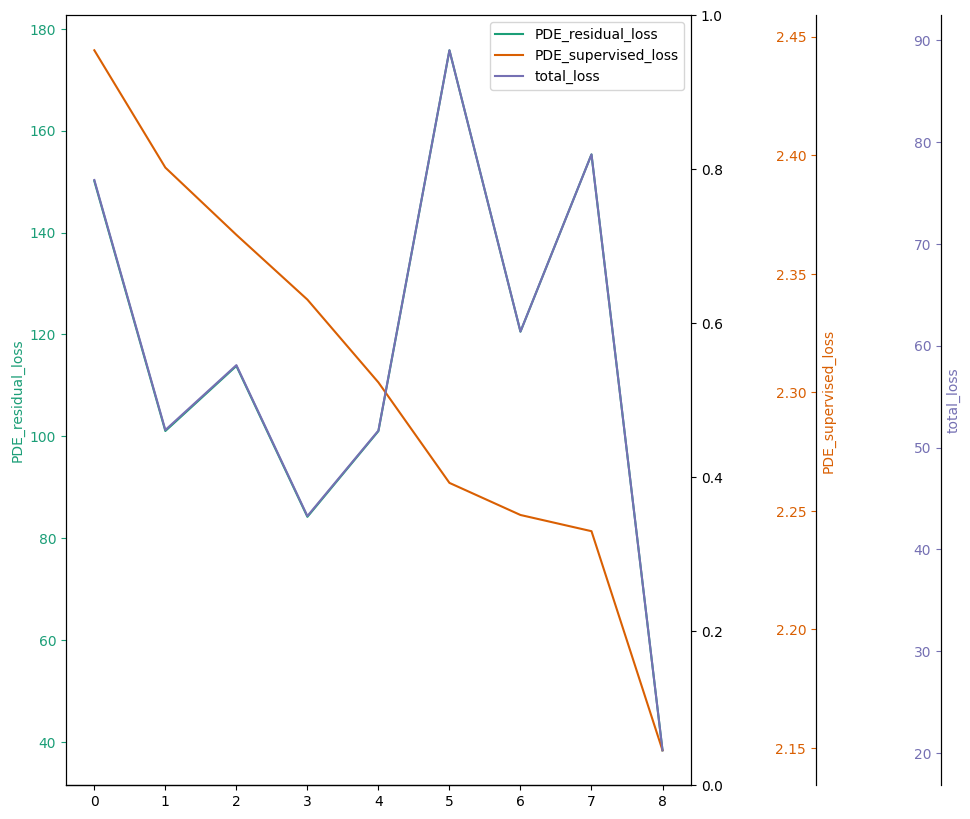

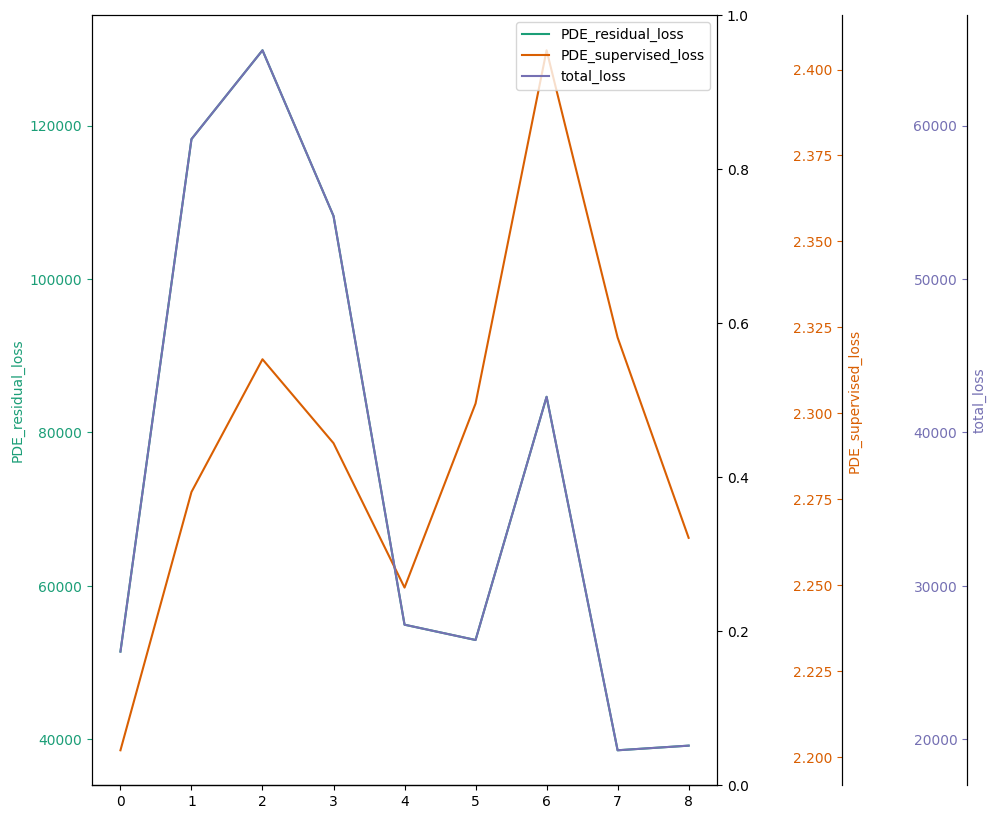

In [58]:

#plt.plot(step_loss["PDE_supervised_loss"][-100:])

inidx_1=-10
inidx_2=-1

step_loss={}
for k in hist[1]["train"][0].keys():
#for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"])) for ep in hist.keys()
        #reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
colors = mpl.colormaps['Dark2'].colors

for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()


step_loss={}
for k in hist[1]["test"][0].keys():
#for k in hist[1]["test"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"])) for ep in hist.keys()
        #reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
    )

fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
colors = mpl.colormaps['Dark2'].colors

for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()

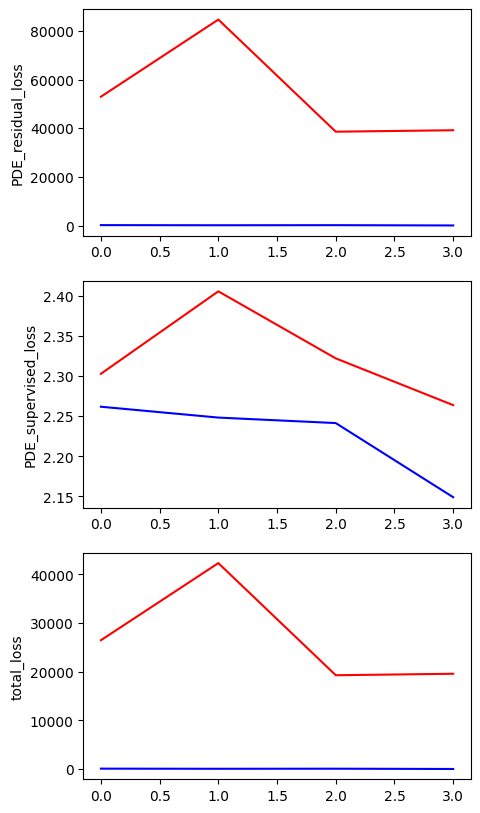

In [55]:
step_loss_train={}
step_loss_test={}
#for k in hist[1]["train"]["generative_losses"][0].keys():
for k in hist[1]["train"][0].keys():
    step_loss_train[k]=list(
        #reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"])) for ep in hist.keys()
    )

#for k in hist[1]["test"]["generative_losses"][0].keys():
for k in hist[1]["test"][0].keys():
    step_loss_test[k]=list(
        #reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"])) for ep in hist.keys()
    )
    
axss=[]

inidx_1=-5
inidx_2=-1
#fig,axs=plt.subplots(figsize=(5,5))
fig=plt.figure(figsize=(5,10))

t_lines=[]
axs=fig.subplots(len(step_loss_train.keys()),1)
for i,(ax,k) in enumerate(zip(axs,step_loss_train.keys())):
    line=ax.plot(np.arange(len(step_loss_train[k][inidx_1:inidx_2])),step_loss_train[k][inidx_1:inidx_2],color='b',label=k)
    line=ax.plot(np.arange(len(step_loss_test[k][inidx_1:inidx_2])),step_loss_test[k][inidx_1:inidx_2],color='r',label=k)
    ax.set(ylabel=k)
    t_lines.append(line)
    axss.append(axs)

plt.show()

In [32]:
hist[1]['train']

{'discriminative_losses': [{'generative_entropy_loss': tensor(2.3536),
   'generative_posterior_loss': tensor(0.5465),
   'PDE_residual_loss': tensor(9.3761),
   'PDE_supervised_loss': tensor(1.6529),
   'Discriminator_loss': tensor(295.3047),
   'Generator_loss': tensor(2.2158),
   'total_loss': tensor(311.4496)},
  {'generative_entropy_loss': tensor(1.5258),
   'generative_posterior_loss': tensor(0.5689),
   'PDE_residual_loss': tensor(1.1036),
   'PDE_supervised_loss': tensor(0.2022),
   'Discriminator_loss': tensor(342.8704),
   'Generator_loss': tensor(0.4016),
   'total_loss': tensor(346.6725)},
  {'generative_entropy_loss': tensor(0.7925),
   'generative_posterior_loss': tensor(0.6707),
   'PDE_residual_loss': tensor(0.5387),
   'PDE_supervised_loss': tensor(0.4849),
   'Discriminator_loss': tensor(402.1383),
   'Generator_loss': tensor(0.5270),
   'total_loss': tensor(405.1521)},
  {'generative_entropy_loss': tensor(0.8865),
   'generative_posterior_loss': tensor(0.5956),
   'P

# Data sensibility test

In [20]:
root="../Exps/Data_sensibility_exps/GAN_PI"
#model_id="GAN_PI_LL_s10_PDELL"
model_id="GAN_PI_PointNet_LL_PDELL_D1_G1"
model_id="GAN_PI_PointNet_LL_r10_PDELL"
model_id="GAN_PI__MultiP20_PointNet_LL_PDELL"
model_id="GAN_PI__MultiP50_PointNet_LL_PDELL"
#model_id="GAN_PI_PointNet_LL_PDELL_G_PointN_D_MLP"

In [16]:
os.listdir(os.path.join(root,model_id))

['best.pt', 'config.json', 'loss_results.npy']

In [17]:
#root="../Exps/Data_sensibility_exps/GAN_PI"

#model_id="GAN_PI_LL_s10_PDELL"

print(os.listdir(os.path.join(root,model_id)))

hist=np.load(os.path.join(root,model_id,"70_loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

['best.pt', 'config.json', 'loss_results.npy']


FileNotFoundError: [Errno 2] No such file or directory: '../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP50_PointNet_LL_PDELL/70_loss_results.npy'

In [21]:
import glob
glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))

[]

../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/10_loss_results.npy
23.84374
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/25_loss_results.npy
23.024914
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/50_loss_results.npy
22.82456
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/5_loss_results.npy
23.2777
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/70_loss_results.npy
22.990314
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/80_loss_results.npy
22.97432
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/95_loss_results.npy
15.893686


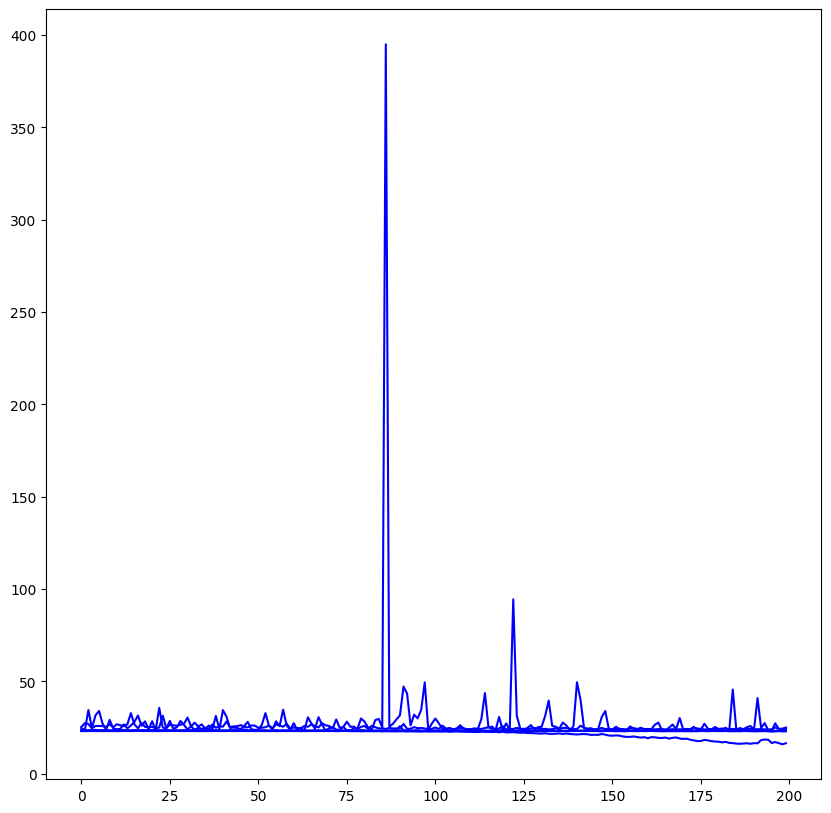

In [12]:
fig,axs=plt.subplots(figsize=(10,10))
inidx_1=300
inidx_2=-1
color='b'
for res in glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))[:]:
    print(res)
    step_loss={}
    hist=np.load(res,allow_pickle=True)
    hist=hist.tolist()
    for k in hist[0]["train"]["generative_losses"][0].keys():
        step_loss[k]=list(
            reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
        )
    axs.plot(np.arange(len(step_loss['PDE_residual_loss'][inidx_1:])),step_loss['PDE_residual_loss'][inidx_1:],color=color,label=k)
    print(np.min(step_loss['PDE_residual_loss'][inidx_1:]))
plt.show()



../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/10_loss_results.npy
23.220758
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/25_loss_results.npy
23.178001
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/50_loss_results.npy
22.900185
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/5_loss_results.npy
23.412628
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/70_loss_results.npy
23.6234
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/80_loss_results.npy
23.803652
../Exps/Data_sensibility_exps/GAN_PI/GAN_PI__MultiP20_PointNet_LL_PDELL/95_loss_results.npy
19.042019


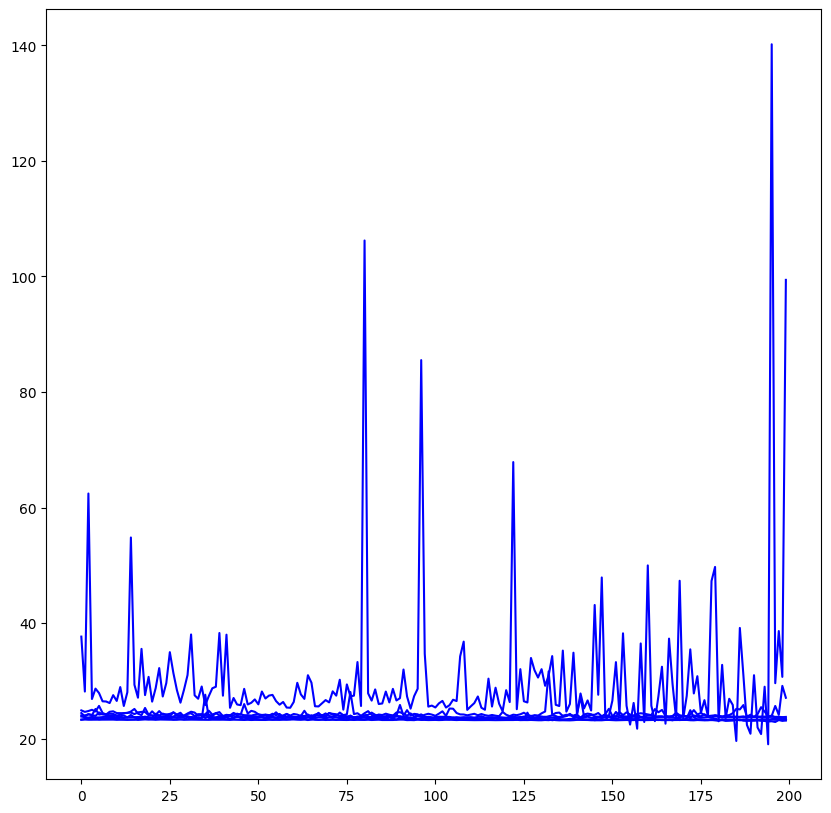

In [14]:
fig,axs=plt.subplots(figsize=(10,10))
inidx_1=300
inidx_2=-1
color='b'
for res in glob.glob((os.path.join(root,model_id,"*_loss_results.npy")))[:]:
    print(res)
    step_loss={}
    hist=np.load(res,allow_pickle=True)
    hist=hist.tolist()
    for k in hist[0]["test"]["generative_losses"][0].keys():
        step_loss[k]=list(
            reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
        )
    axs.plot(np.arange(len(step_loss['PDE_residual_loss'][int(inidx_1):])),step_loss['PDE_residual_loss'][int(inidx_1):],color=color,label=k)
    print(np.min(step_loss['PDE_residual_loss'][int(inidx_1):]))
plt.show()

In [31]:
np.load(os.path.join(root,model_id,"70_loss_results.npy"),allow_pickle=True).tolist()[0]

{'test': {'discriminative_losses': [{'generative_entropy_loss': tensor(-0.1200),
    'generative_posterior_loss': tensor(0.0660),
    'PDE_residual_loss': tensor(2.0963),
    'PDE_supervised_loss': tensor(2.1354),
    'Discriminator_loss': tensor(586.6686),
    'Generator_loss': tensor(1.0444),
    'total_loss': tensor(591.8907)},
   {'generative_entropy_loss': tensor(-0.1183),
    'generative_posterior_loss': tensor(0.0655),
    'PDE_residual_loss': tensor(1.9497),
    'PDE_supervised_loss': tensor(2.1352),
    'Discriminator_loss': tensor(586.9296),
    'Generator_loss': tensor(1.0080),
    'total_loss': tensor(591.9698)},
   {'generative_entropy_loss': tensor(-0.1079),
    'generative_posterior_loss': tensor(0.0777),
    'PDE_residual_loss': tensor(1.9755),
    'PDE_supervised_loss': tensor(2.1249),
    'Discriminator_loss': tensor(585.3234),
    'Generator_loss': tensor(1.0176),
    'total_loss': tensor(590.4112)},
   {'generative_entropy_loss': tensor(-0.1133),
    'generative_pos

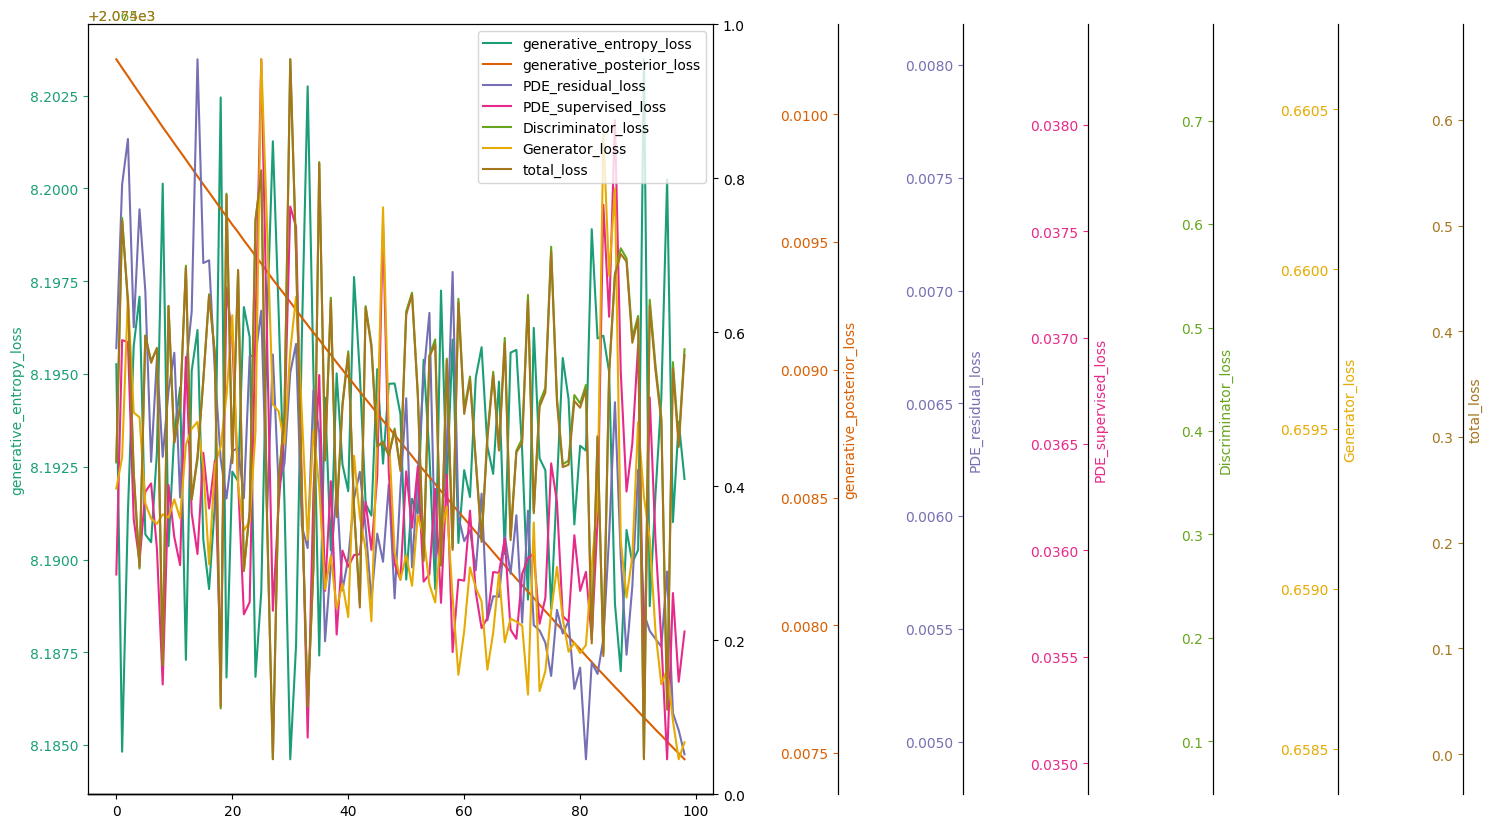

In [497]:
#plt.plot(step_loss["PDE_supervised_loss"][-100:])

step_loss={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

inidx_1=700
inidx_2=-1
fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()